## Observations and Insights 

Capomulin and Ramicane outperformed Infubinol and Ceftamin in reducing tumor volume
There is a strong positive correlation between weight and tumor volume
Further analysis should be conducted to determine if a correlation exists between tumor reduction and mouse weight, and tumor reduction by sex


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata_df=pd.DataFrame(mouse_metadata)
study_results_df=pd.DataFrame(study_results)
# Combine the data into a single dataset

mouse_study_df=pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=(mouse_study_df['Mouse ID'].nunique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate=mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)].copy()
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=mouse_study_df[mouse_study_df["Mouse ID"]!="g989"]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


In [7]:
tumor_mean=cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median=cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance=cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std=cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem=cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df=pd.DataFrame.from_records({
    "Mean Tumor Volume":tumor_mean,
    "Median Tumor Volume":tumor_median,
    "Variance Tumor Volume":tumor_variance,
    "Std Dev Tumor Volume":tumor_std,
    "SEM Tumor Volume":tumor_sem
})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume_df



,Mean Tumor Volume,Median Tumor Volume,SEM Tumor Volume,Std Dev Tumor Volume,Variance Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


In [8]:

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

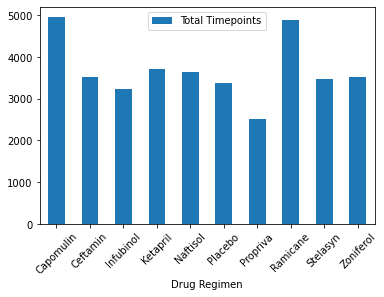

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#set index on DR--create new dataframewith timepoint count
agg_df["Total Timepoints"] = cleaned_df.groupby("Drug Regimen")["Timepoint"].sum()
agg_df.reset_index(inplace=True)
agg_bar = agg_df.plot.bar(x="Drug Regimen", y="Total Timepoints", rot=45)


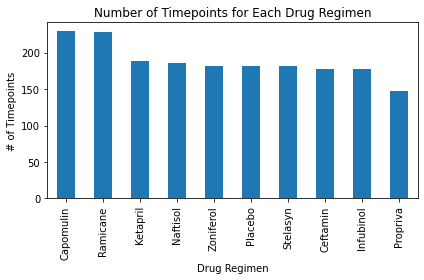

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs_timepoints=cleaned_df["Drug Regimen"].value_counts()
drugs_timepoints.plot(kind='bar', y=["Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.title("Number of Timepoints for Each Drug Regimen")
plt.tight_layout()



<AxesSubplot:title={'center':'Mouse Distribution by Sex'}, ylabel='Mouse ID'>

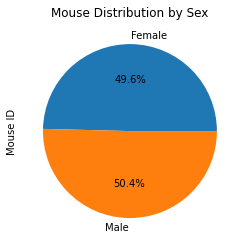

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = pd.DataFrame(cleaned_df.groupby(['Sex']).nunique())
sex_data = sex_data['Mouse ID']
sex_data.plot(kind='pie', title = 'Mouse Distribution by Sex', autopct = '%1.1f%%')

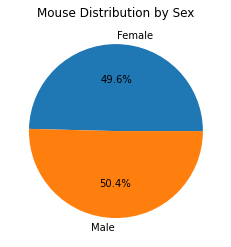

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=  ['Female', 'Male']
plt.pie(sex_data, autopct = '%1.1f%%', labels = labels)
plt.title('Mouse Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_point_df=cleaned_df.merge(last_timepoint, on=['Mouse ID', 'Timepoint'])
time_point_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = time_point_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

The lower quartile of tumor size is: 45.87586684749999
The upper quartile of tumor size is: 65.05362410500001
The interquartile range of tumor size is: 19.17775725750002
The the median of tumor size is: 55.793278175 


In [16]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in drugs:
    drug_df=time_point_df.loc[time_point_df['Drug Regimen'] == drug]
    
    tumor_volume.append(drug_df['Tumor Volume (mm3)'])
    
print(tumor_volume)

[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64, 49     67.973419
50     65.525743
57     57.031862
58     66.083066
70     72.226731
74   

In [17]:
# Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


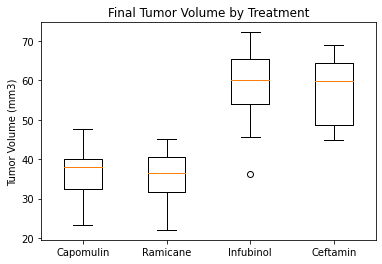

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig,ax = plt.subplots()
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volume, labels = drugs)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

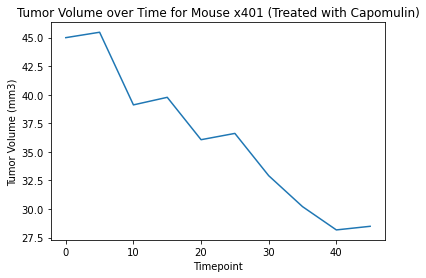

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse=cleaned_df[(cleaned_df['Mouse ID']=='x401')]
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.title("Tumor Volume over Time for Mouse x401 (Treated with Capomulin)")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')


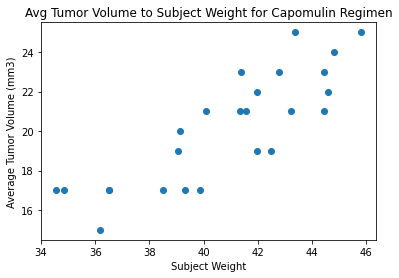

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen--all mice on Cap

cap_tumor_vol = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_mouse_weight =  cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")].groupby("Mouse ID")["Weight (g)"].min()


plt.title("Avg Tumor Volume to Subject Weight for Capomulin Regimen")
plt.xlabel("Subject Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(cap_tumor_vol, cap_mouse_weight)

## Correlation and Regression

The correlation coefficient for mouse weight vs tumor volume for mice on the Capomulin regimen is (0.8419363424694717, 1.322572243471279e-07)


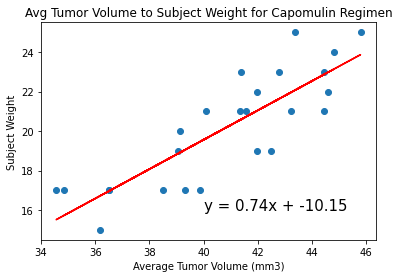

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_tumor_vol, cap_mouse_weight)
regress_values = cap_tumor_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Avg Tumor Volume to Subject Weight for Capomulin Regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Subject Weight")
plt.scatter(cap_tumor_vol,cap_mouse_weight)
plt.plot(cap_tumor_vol,regress_values,"r-")
plt.annotate(line_eq, (40, 16), fontsize = 15)
corr_coeff = st.pearsonr(cap_tumor_vol, cap_mouse_weight)
print(f'The correlation coefficient for mouse weight vs tumor volume for mice on the Capomulin regimen is {corr_coeff}')